<a href="https://colab.research.google.com/github/jyotiraj-code/dissertation/blob/main/Practice%20Codes/Calculation_of_the_expectation_value_(with_changes_made).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Agenda:

- Generate a value for the number of qubits
- Take a random quantum state
- Take the quantum state and apply the QFT as defined previously
- Now retun the generated state
- Turn to the graphs, generate a random graph with the usage of the fact qubits (nodes): edges = 2:1, using networkx
- Get the values for the edges from G.edge()
- Now switch back to the states and apply the Rzz to those particular edges
- Again Apply another QFT' which uses a reverse order of gates than the first used QFT
- Use the local expectation value calculation and get the result for the expectation value

In [77]:
#Imports and Installations

!pip install -U git+https://github.com/jcmgray/quimb.git --quiet

%config InlineBackend.figure_formats = ['svg']
import quimb as qu
import quimb.tensor as qtn
import numpy as np
from math import pi

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# #1 Let's start with generating the values for the number of qubits

In [53]:
import random

def generate_qubits_number():
    return random.choice([i for i in range(1,10) if i % 2 == 0])

num_qubits = generate_qubits_number()
print(f"The generated even number is: {num_qubits}")


The generated even number is: 6


# #2 Take the random generated number, generate a random quantum state for it, next encode the state to a quantum state

In [54]:
def generate_random_binary(length):
    return ''.join(random.choice(['0', '1']) for _ in range(length))

state_length = num_qubits
random_state = generate_random_binary(state_length)
print(f"The generated random state is: {random_state}")
print()


The generated random state is: 010000



I tried two methods for the following code:

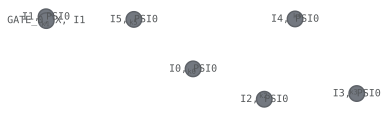

In [55]:
#First let us create the circuit so that we can store the states in their particular order
qc = qtn.Circuit(num_qubits)
#Getting the registers
regs = list(range(num_qubits))
#Encoding the values
for i, number in enumerate(random_state):
  if number =='1':
    qc.apply_gate('X', regs[i])
# print(regs)

qc.psi.draw()
#Drawing the circuit
# qc.psi.to_dense()

The other method: (to be explored later)

In [ ]:
zero_state = qtn.tensor(qu.up())
one_state = qtn.tensor(qu.up())



# #3 As we encoded the state and also generated the quantum circuit, it is now time to do the Quantum Fourier Transform as generated previously in a codebase (directly copying from there)

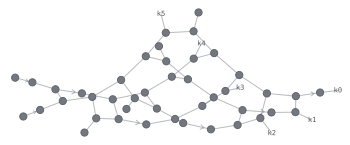

In [56]:
import numpy as np
import quimb.tensor as qtn

# Function to apply QFT rotations
def qft_rotations(circuit, qubits):
    for i in range(len(qubits)):
        circuit.apply_gate('H', qubits[i])
        for j in range(i+1, len(qubits)):
            lamda = np.pi / 2**(j - i)
            circuit.apply_gate('CPHASE', lamda, qubits[i], qubits[j])

# Function to apply the QFT to the circuit
def qft(circuit, qubits):
    qft_rotations(circuit, qubits)
    for i in range(len(qubits)//2):
        circuit.apply_gate('SWAP', qubits[i], qubits[len(qubits)-i-1])


# Apply the QFT to the entire circuit
qft(qc, range(num_qubits))

#Drawing the circuit again
qc.psi.draw()

# #4 Now we move towards a graph and generate a random graph with node (qubits) : edge = 2:1 ratio and create the graph, save the graph with a seed, get the graph details for the edges, apply Rzz gate to those levels and then check the diagram

EdgeView([(1, 5), (2, 3), (3, 4)])

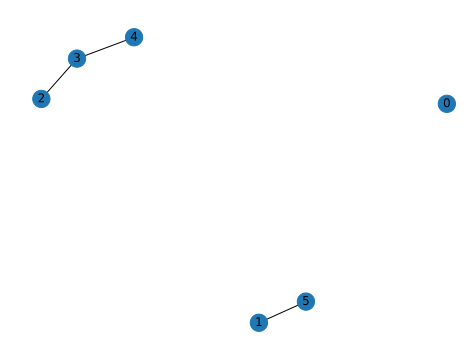

In [69]:
import networkx as nx
import random

# Define the number of nodes
num_nodes = num_qubits

# Calculate the number of edges based on the 2:1 node-to-edge ratio
num_edges = num_nodes // 2

# Create an empty graph
G = nx.Graph(seed = '666')

# Add nodes to the graph
G.add_nodes_from(range(num_nodes))

# Randomly add edges until the desired number of edges is reached
while G.number_of_edges() < num_edges:
    # Pick two random nodes to connect with an edge
    u, v = random.sample(range(num_nodes), 2)
    # Add the edge if it doesn't already exist
    if not G.has_edge(u, v):
        G.add_edge(u, v)

# Draw the graph
nx.draw(G, with_labels=True)
display(nx.edges(G))

Applying the Rzz gates to those particular gates

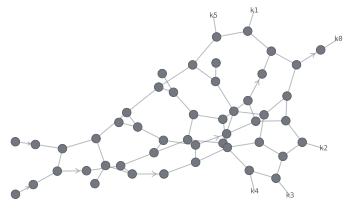

In [70]:
import numpy as np

# Define theta
theta = np.pi / 4

# List of (i, j) pairs
pairs = [(1, 5), (2, 3), (3, 4)]

# Loop through each pair and apply the RZZ gate
for i, j in pairs:
    qc.apply_gate("RZZ", theta, i, j)


qc.psi.draw()

#  #4 Now we swtich back to QFT' which implements the reverse order of gates as that of the QFT defined earlier, this way we create a scenario for generating the expectation value result


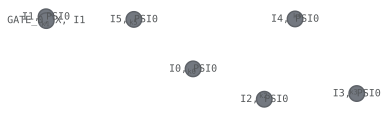

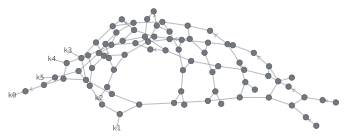

(None, None)

In [84]:
# Function to apply QFT rotations in reverse order
#First let us create the circuit so that we can store the states in their particular order

qc = qtn.Circuit(num_qubits)
#Getting the registers
regs = list(range(num_qubits))
#Encoding the values
for i, number in enumerate(random_state):
  if number =='1':
    qc.apply_gate('X', regs[i])
# print(regs)
def qft(circuit, qubits):
    qft_rotations(circuit, qubits)
    for i in range(len(qubits)//2):
        circuit.apply_gate('SWAP', qubits[i], qubits[len(qubits)-i-1])

        return circuit

def reverse_qft_rotations(circuit, qubits):
    for i in reversed(range(len(qubits))):
        for j in range(i+1, len(qubits)):
            lamda = np.pi / 2**(j - i)
            circuit.apply_gate('CPHASE', lamda, qubits[i], qubits[j])
        circuit.apply_gate('H', qubits[i])

# Function to apply the reverse QFT to the circuit
def reverse_qft(circuit, qubits):
    for i in range(len(qubits)//2):
        circuit.apply_gate('SWAP', qubits[i], qubits[len(qubits)-i-1])
    reverse_qft_rotations(circuit, qubits)
    return circuit

# Apply the reverse QFT to the entire circuit
#r#verse_qft(qc, range(num_qubits))

# Drawing the circuit again
qc.psi.draw(), reverse_qft(qft(qc, range(num_qubits)), range(num_qubits)).psi.draw()

# #5 Now we do the expectation value calculation for the edges which we defined earlier

In [73]:
terms = {(i, j): 1 for i, j in G.edges}
print(terms.items())

dict_items([((1, 5), 1), ((2, 3), 1), ((3, 4), 1)])


In [85]:
G.edges()

EdgeView([(1, 5), (2, 3), (3, 4)])

In [95]:
ens = [
        qc.local_expectation(weight, edge)
        for edge, weight in terms.items()
    ]
ens


100%|██████████| 3/3 [00:56<00:00, 18.74s/it]


In [91]:
!pip install tqdm
import tqdm